# EOF of 
- [ ] SST
- [ ] LCC
- [ ] TCC
- [ ] SSH
- [ ] EKE
- [ ] Winds
- [ ] SW/LW/SH/LH

In [1]:
import xarray as xr
import json
import gcsfs
import numpy as np
import cmocean
import cartopy.crs as ccrs #cartopy coord ref sys
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
from eofs.xarray import Eof as eof

In [24]:
pwd

'/work5/stb/MHW-gfdl'

In [27]:
def open_ds(filename):
    ds = xr.open_dataset(f'/work5/stb/ERA5/{filename}.nc', chunks={})
    return ds

In [28]:
sst_ds = open_ds('sst')
tcc_ds = open_ds('tcc')
mslp_ds = open_ds('mslp')
u10_ds = open_ds('u10')
v10_ds = open_ds('v10')
mask_ds = open_ds('mask')
lcc_ds = open_ds('lcc')

In [30]:
#Resample vars from hourly to daily
sst = sst_ds.sea_surface_temperature.resample(time='1D').mean()#.sel(**time_slice)
tcc = tcc_ds.total_cloud_cover.resample(time='1D').mean()#.sel(**time_slice)
mslp = mslp_ds.mean_sea_level_pressure.resample(time='1D').mean()#.sel(**time_slice)
u10 = u10_ds['10m_u_component_of_wind'].resample(time='1D').mean()#.sel(**time_slice)
v10 = v10_ds['10m_v_component_of_wind'].resample(time='1D').mean()#.sel(**time_slice)
mask = mask_ds.land_sea_mask
lcc = lcc_ds.lcc.resample(time='1D').mean()#.sel(**time_slice)

In [5]:
sst

<xarray.DataArray 'sea_surface_temperature' (time: 23011, latitude: 55,
                                             longitude: 69)> Size: 349MB
dask.array<transpose, shape=(23011, 55, 69), dtype=float32, chunksize=(5752, 55, 69), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
  * time       (time) datetime64[ns] 184kB 1959-01-01 1959-01-02 ... 2021-12-31

In [21]:
solver = eof(sst)

In [23]:
solver

In [22]:
eofs = solver.eofs(neofs=3)

In [24]:
eofs

<xarray.DataArray 'eofs' (mode: 3, latitude: 55, longitude: 69)> Size: 46kB
array([[[        nan,         nan,         nan, ...,         nan,
         -0.03731564, -0.03521486],
        [        nan,         nan,         nan, ...,         nan,
         -0.03571955, -0.03301829],
        [        nan,         nan,         nan, ...,         nan,
         -0.03330232, -0.03042373],
        ...,
        [        nan,         nan,         nan, ..., -0.00552236,
         -0.0055705 , -0.00564764],
        [        nan,         nan,         nan, ..., -0.00522782,
         -0.00523621, -0.00528255],
        [        nan,         nan,         nan, ..., -0.00495074,
         -0.00494171, -0.0049525 ]],

       [[        nan,         nan,         nan, ...,         nan,
          0.04572245,  0.03224594],
        [        nan,         nan,         nan, ...,         nan,
          0.03870006,  0.02468058],
        [        nan,         nan,         nan, ...,         nan,
          0.02868573,  0.01584652],
...
        [        nan,         nan,         nan, ..., -0.01815898,
         -0.01823151, -0.01819377],
        [        nan,         nan,         nan, ..., -0.0183309 ,
         -0.0185221 , -0.01846445],
        [        nan,         nan,         nan, ..., -0.01827368,
         -0.01852232, -0.01848367]],

       [[        nan,         nan,         nan, ...,         nan,
         -0.01098463, -0.00434817],
        [        nan,         nan,         nan, ...,         nan,
         -0.01121886, -0.00263774],
        [        nan,         nan,         nan, ...,         nan,
         -0.00788147,  0.00062914],
        ...,
        [        nan,         nan,         nan, ..., -0.01917035,
         -0.01856926, -0.0181107 ],
        [        nan,         nan,         nan, ..., -0.01967765,
         -0.01915621, -0.01882795],
        [        nan,         nan,         nan, ..., -0.02022422,
         -0.0196744 , -0.01930978]]], dtype=float32)
Coordinates:
  * mode       (mode) int64 24B 0 1 2
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
Attributes:
    long_name:  empirical_orthogonal_functions

In [34]:
variance_fractions = solver.varianceFraction(neigs=3)

In [36]:
variance_fractions

<xarray.DataArray 'variance_fractions' (mode: 3)> Size: 12B
array([0.95301837, 0.01577361, 0.00646208], dtype=float32)
Coordinates:
  * mode     (mode) int64 24B 0 1 2
Attributes:
    long_name:  variance_fractions

In [35]:
pc = solver.pcs(npcs=3)

In [37]:
pc

<xarray.DataArray 'pcs' (time: 23011, mode: 3)> Size: 276kB
array([[156.92639  , -11.736214 ,   1.3262331],
       [161.79779  , -11.523042 ,   1.0418243],
       [166.75787  , -11.2619095,   0.802057 ],
       ...,
       [ 62.195072 , -13.048689 ,   1.9888512],
       [ 55.94525  ,  -8.499609 ,   1.495006 ],
       [ 49.889503 ,  -4.7439685,   1.133823 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 184kB 1959-01-01 1959-01-02 ... 2021-12-31
  * mode     (mode) int64 24B 0 1 2

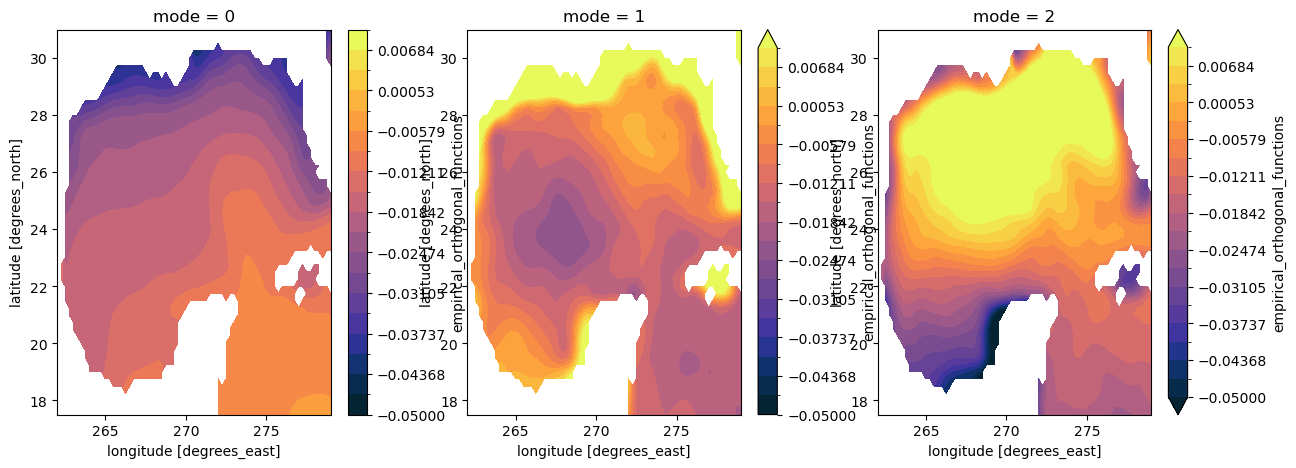

In [42]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
eofs.isel(mode=0).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[0])
eofs.isel(mode=1).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[1])
eofs.isel(mode=2).plot.contourf(levels=np.linspace(-0.05, .01, 20),cmap=cmocean.cm.thermal, ax=ax[2]);

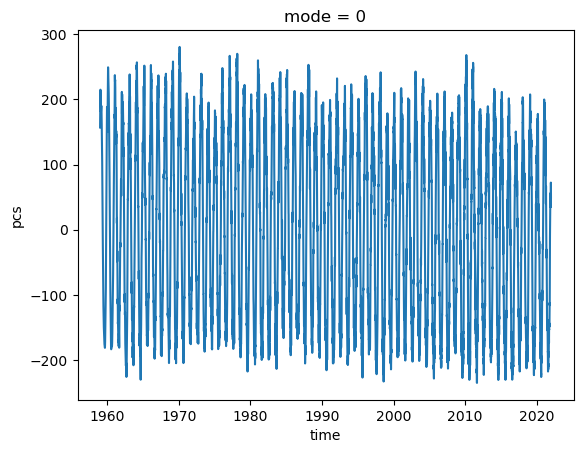

In [40]:
pc.isel(mode=0).plot();

In [41]:
pc.isel(mode=0).mean()

<xarray.DataArray 'pcs' ()> Size: 4B
array(3.427815e-07, dtype=float32)
Coordinates:
    mode     int64 8B 0

In [6]:
def eof_func(data):
    # this sets it up
    solver = eof(data) # data with a time vector
    # compute the EOF
    eofs = solver.eofs(neofs=3)
    # variance explained
    variance_fractions = solver.varianceFraction(neigs=3) # number eigenvalues
    # principal component
    pc = solver.pcs(npcs=3)

    return eofs, variance_fractions, pc

In [8]:
from dask.distributed import Client

client = Client("tcp://140.208.147.165:42947")
client

<Client: 'tcp://140.208.147.165:42947' processes=8 threads=8, memory=44.72 GiB>

Task exception was never retrieved
future: <Task finished name='Task-3471' coro=<Client._gather.<locals>.wait() done, defined at /home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
Task exception was never retrieved
future: <Task finished name='Task-3495' coro=<Client._gather.<locals>.wait() done, defined at /home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py:2394> exception=AllExit()>
Traceback (most recent call last):
  File "/home/Shanice.Bailey/.local/lib/python3.11/site-packages/distributed/client.py", line 2403, in wait
    raise AllExit()
distributed.client.AllExit
2025-03-04 11:55:02,381 - distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client


In [9]:
sst_eof = eof_func(sst)
tcc_eof = eof_func(tcc)
mslp_eof = eof_func(mslp)
u10_eof = eof_func(u10)
v10_eof = eof_func(v10)
lcc_eof = eof_func(lcc)

In [30]:
lcc_eof[0].to_netcdf('lcc_eofs.nc')
lcc_eof[1].to_netcdf('lcc_var_frac.nc')
lcc_eof[2].to_netcdf('lcc_pcs.nc')

In [12]:
tcc_eof[0]

<xarray.DataArray 'eofs' (mode: 3, latitude: 55, longitude: 69)> Size: 46kB
array([[[-0.00245413, -0.00251431, -0.00250498, ...,  0.0089238 ,
          0.00938895,  0.00975956],
        [-0.00233024, -0.0024194 , -0.00240089, ...,  0.00954972,
          0.01007207,  0.01045732],
        [-0.00220203, -0.00226595, -0.00221428, ...,  0.01017547,
          0.0107341 ,  0.01110083],
        ...,
        [ 0.01408823,  0.01431939,  0.01428249, ...,  0.00706386,
          0.00687765,  0.00669743],
        [ 0.01392744,  0.01415892,  0.01435289, ...,  0.00672147,
          0.00653601,  0.00636733],
        [ 0.01271781,  0.01347015,  0.01370984, ...,  0.0063895 ,
          0.0062243 ,  0.00606017]],

       [[ 0.01778532,  0.0183333 ,  0.01886404, ...,  0.01374855,
          0.0135627 ,  0.01301053],
        [ 0.01816093,  0.01867599,  0.01922154, ...,  0.01341869,
          0.013135  ,  0.01252382],
        [ 0.0186304 ,  0.01909585,  0.01959043, ...,  0.01290498,
          0.01260145,  0.01196951],
...
        [-0.00928885, -0.00967185, -0.01011211, ..., -0.01668003,
         -0.01653852, -0.01635752],
        [-0.00984693, -0.01023045, -0.01068392, ..., -0.01648104,
         -0.01628053, -0.01613259],
        [-0.01021744, -0.01047092, -0.01093007, ..., -0.01618988,
         -0.01600484, -0.01586057]],

       [[-0.00939983, -0.00923136, -0.00899014, ...,  0.02895912,
          0.02866854,  0.02814881],
        [-0.00997014, -0.00978128, -0.00954484, ...,  0.02914425,
          0.02876016,  0.0282156 ],
        [-0.01055518, -0.01031881, -0.0100216 , ...,  0.02918364,
          0.02873934,  0.02810658],
        ...,
        [-0.00831804, -0.00951561, -0.01126965, ...,  0.00661295,
          0.00655694,  0.00652495],
        [-0.00725311, -0.00845236, -0.01007206, ...,  0.00642305,
          0.00637907,  0.00635742],
        [-0.00476358, -0.00648935, -0.00801777, ...,  0.00626099,
          0.00621772,  0.00617134]]], dtype=float32)
Coordinates:
  * mode       (mode) int64 24B 0 1 2
  * latitude   (latitude) float32 220B 31.0 30.75 30.5 30.25 ... 18.0 17.75 17.5
  * longitude  (longitude) float32 276B 262.0 262.2 262.5 ... 278.5 278.8 279.0
Attributes:
    long_name:  empirical_orthogonal_functions

In [74]:
tcc_eof[1]

<xarray.DataArray 'variance_fractions' (mode: 3)> Size: 12B
array([0.30310103, 0.21889408, 0.09543522], dtype=float32)
Coordinates:
  * mode     (mode) int64 24B 0 1 2
Attributes:
    long_name:  variance_fractions

In [51]:
tcc_eof[2]

<xarray.DataArray 'pcs' (time: 23011, mode: 3)> Size: 276kB
array([[ 21.263498 ,   4.1313   ,   1.2970179],
       [ 18.33651  ,   5.8645005,   6.1305075],
       [ -4.4150095,   3.155595 ,   8.664298 ],
       ...,
       [-19.27205  ,   5.1316705,   2.9778063],
       [-18.199583 ,   7.132977 ,   2.1888971],
       [-16.622326 ,   7.459781 ,   2.1575634]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 184kB 1959-01-01 1959-01-02 ... 2021-12-31
  * mode     (mode) int64 24B 0 1 2

In [10]:
def open_ds(filename):
    ds = xr.open_mfdataset(f'/work5/stb/MHW-gfdl/eofs/{filename}*.nc', chunks={})
    return ds

In [13]:
sst_eof = open_ds('sst')
tcc_eof = open_ds('tcc')
mslp_eof = open_ds('mslp')
u10_eof = open_ds('u10')
v10_eof = open_ds('v10')
lcc_eof = open_ds('lcc')

In [15]:
sst_eof

<xarray.Dataset> Size: 506kB
Dimensions:             (mode: 3, latitude: 55, longitude: 69, time: 23011)
Coordinates:
  * mode                (mode) int64 24B 0 1 2
  * latitude            (latitude) float32 220B 31.0 30.75 30.5 ... 17.75 17.5
  * longitude           (longitude) float32 276B 262.0 262.2 ... 278.8 279.0
  * time                (time) datetime64[ns] 184kB 1959-01-01 ... 2021-12-31
Data variables:
    eofs                (mode, latitude, longitude) float32 46kB dask.array<chunksize=(3, 55, 69), meta=np.ndarray>
    pcs                 (time, mode) float32 276kB dask.array<chunksize=(23011, 3), meta=np.ndarray>
    variance_fractions  (mode) float32 12B dask.array<chunksize=(3,), meta=np.ndarray>

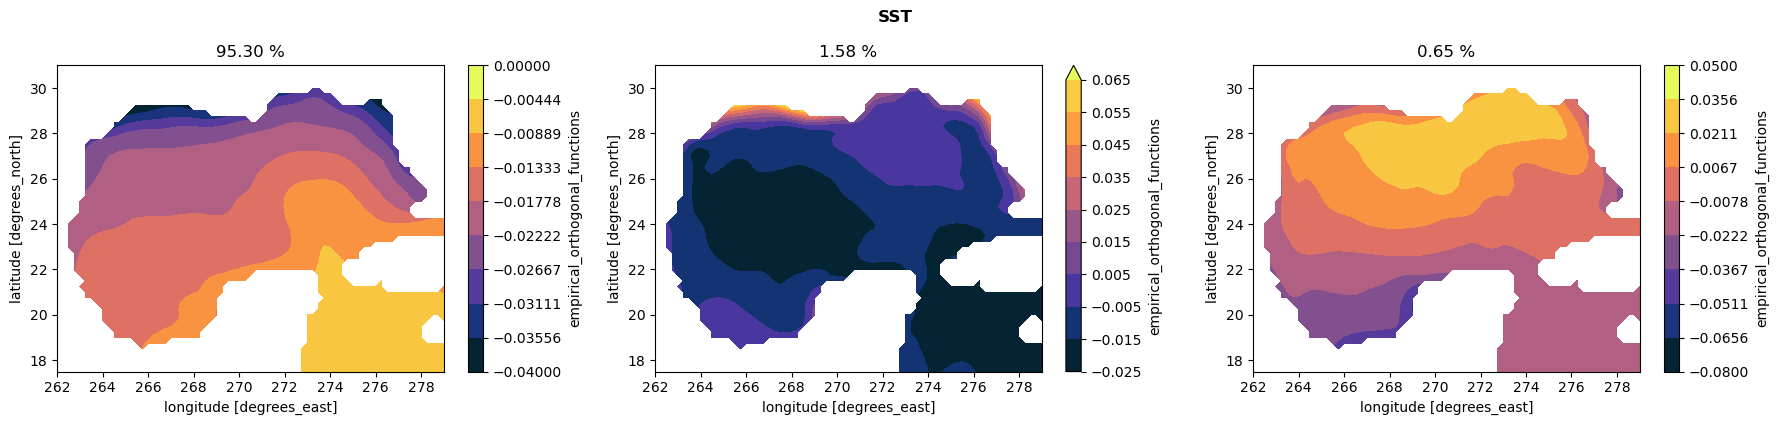

In [58]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
sst_eof.eofs[0].where(mask==0).plot.contourf(ax=ax[0], levels=np.linspace(-0.04, 0, 10), cmap=cmocean.cm.thermal)
ax[0].set_title(f'{sst_eof.variance_fractions[0].values*100:.2f} %')

sst_eof.eofs[1].where(mask==0).plot.contourf(ax=ax[1], levels=np.linspace(-0.025, .065, 10), cmap=cmocean.cm.thermal)
ax[1].set_title(f'{sst_eof.variance_fractions[1].values*100:.2f} %')

sst_eof.eofs[2].where(mask==0).plot.contourf(ax=ax[2], levels=np.linspace(-0.08, .05, 10), cmap=cmocean.cm.thermal)
ax[2].set_title(f'{sst_eof.variance_fractions[2].values*100:.2f} %')

plt.tight_layout()
plt.suptitle('SST', fontweight='bold', y=1.05);

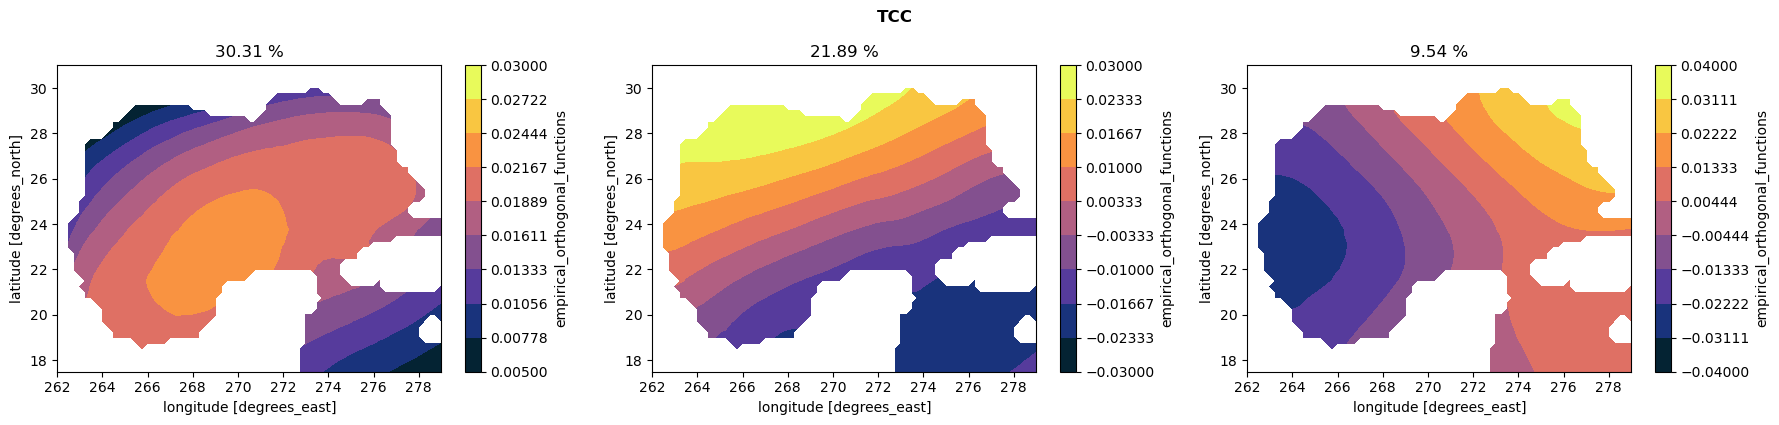

In [71]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

tcc_eof.eofs[0].where(mask==0).plot.contourf(ax=ax[0], levels=np.linspace(0.005, .03, 10),cmap=cmocean.cm.thermal)
ax[0].set_title(f'{tcc_eof.variance_fractions[0].values*100:.2f} %')

tcc_eof.eofs[1].where(mask==0).plot.contourf(ax=ax[1], levels=np.linspace(-0.03, .03, 10),cmap=cmocean.cm.thermal)
ax[1].set_title(f'{tcc_eof.variance_fractions[1].values*100:.2f} %')

tcc_eof.eofs[2].where(mask==0).plot.contourf(ax=ax[2], levels=np.linspace(-0.04, .04, 10),cmap=cmocean.cm.thermal)
ax[2].set_title(f'{tcc_eof.variance_fractions[2].values*100:.2f} %')

plt.tight_layout()
plt.suptitle('TCC', fontweight='bold', y=1.05);

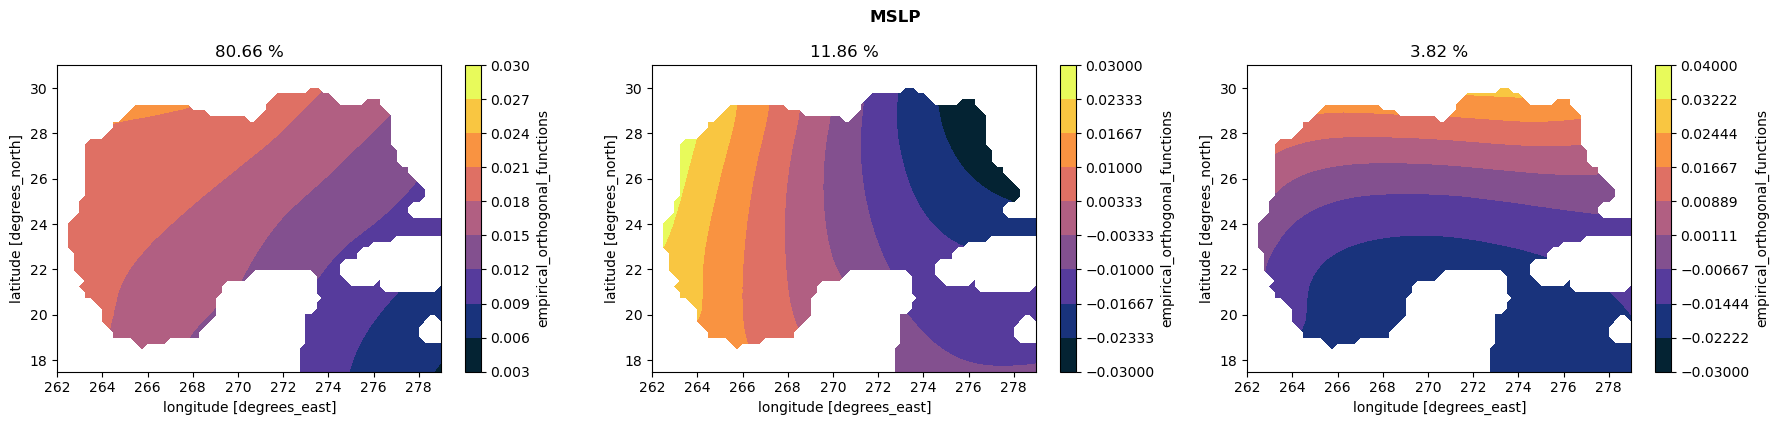

In [76]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
mslp_eof.eofs[0].where(mask==0).plot.contourf(ax=ax[0], levels=np.linspace(0.003, .03, 10),cmap=cmocean.cm.thermal)
ax[0].set_title(f'{mslp_eof.variance_fractions[0].values*100:.2f} %')
mslp_eof.eofs[1].where(mask==0).plot.contourf(ax=ax[1], levels=np.linspace(-0.03, .03, 10),cmap=cmocean.cm.thermal)
ax[1].set_title(f'{mslp_eof.variance_fractions[1].values*100:.2f} %')
mslp_eof.eofs[2].where(mask==0).plot.contourf(ax=ax[2], levels=np.linspace(-0.03, .04, 10),cmap=cmocean.cm.thermal)
ax[2].set_title(f'{mslp_eof.variance_fractions[2].values*100:.2f} %')
plt.tight_layout()
plt.suptitle('MSLP', fontweight='bold', y=1.05);

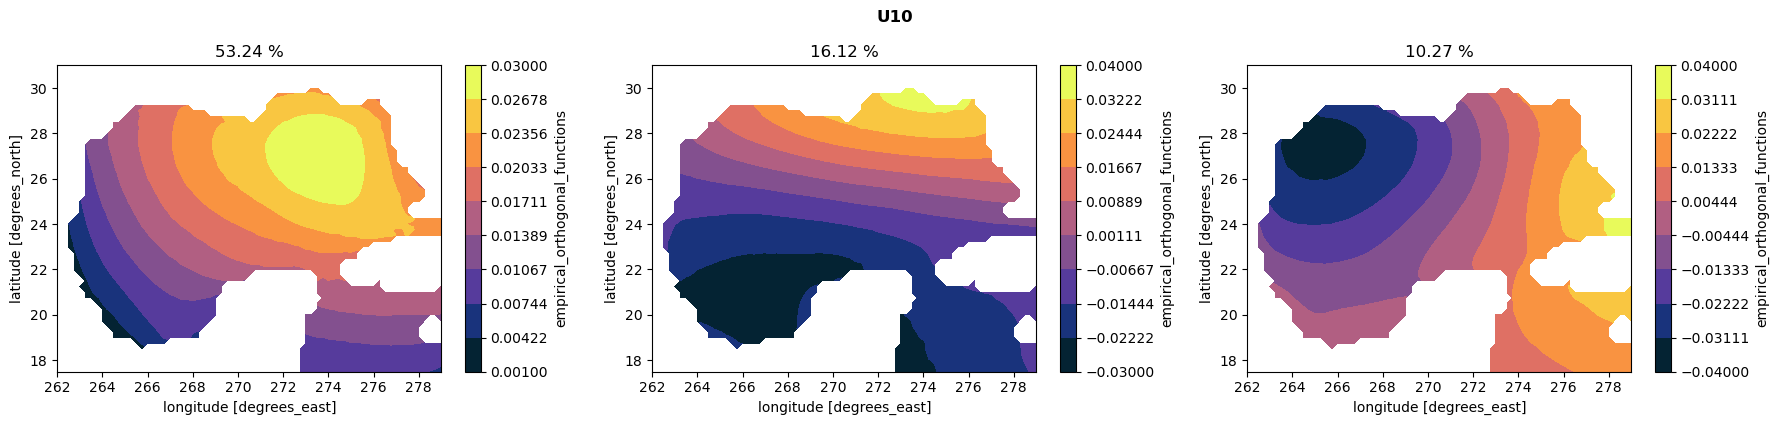

In [81]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
u10_eof.eofs[0].where(mask==0).plot.contourf(ax=ax[0], levels=np.linspace(0.001, .03, 10),cmap=cmocean.cm.thermal)
ax[0].set_title(f'{u10_eof.variance_fractions[0].values*100:.2f} %')
u10_eof.eofs[1].where(mask==0).plot.contourf(ax=ax[1], levels=np.linspace(-0.03, .04, 10),cmap=cmocean.cm.thermal)
ax[1].set_title(f'{u10_eof.variance_fractions[1].values*100:.2f} %')
u10_eof.eofs[2].where(mask==0).plot.contourf(ax=ax[2], levels=np.linspace(-0.04, .04, 10),cmap=cmocean.cm.thermal)
ax[2].set_title(f'{u10_eof.variance_fractions[2].values*100:.2f} %')
plt.tight_layout()
plt.suptitle('U10', fontweight='bold', y=1.05);

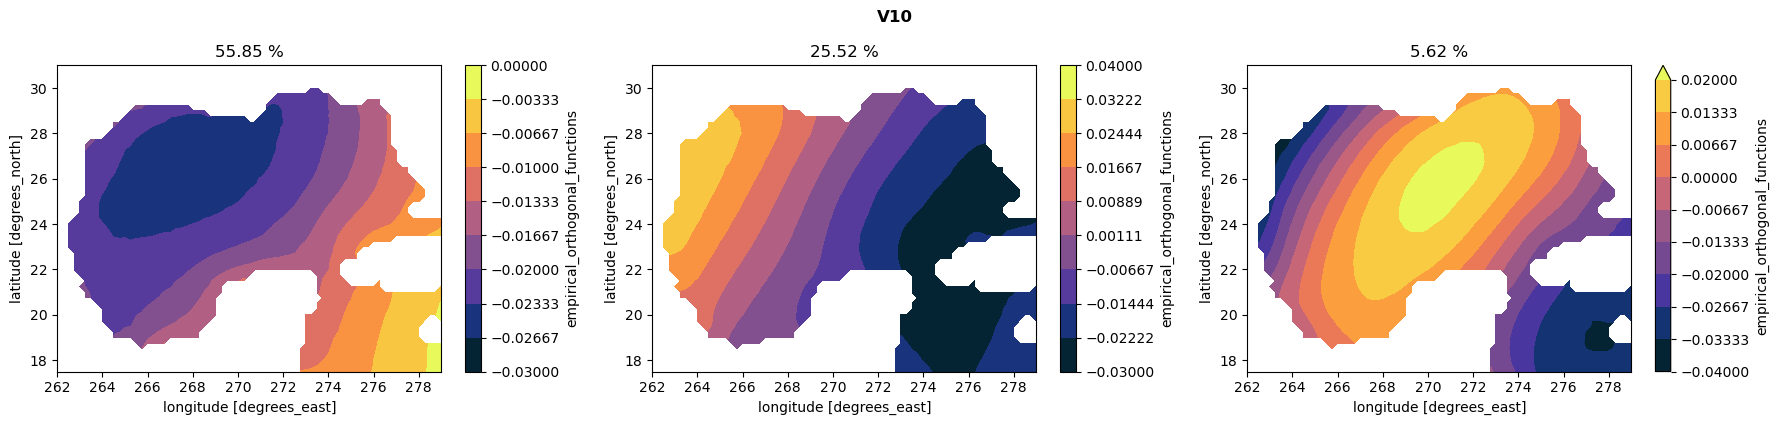

In [91]:
fig, ax = plt.subplots(1,3, figsize=(18,4))
v10_eof.eofs[0].where(mask==0).plot.contourf(ax=ax[0], levels=np.linspace(-0.03, 0, 10),cmap=cmocean.cm.thermal)
ax[0].set_title(f'{v10_eof.variance_fractions[0].values*100:.2f} %')
v10_eof.eofs[1].where(mask==0).plot.contourf(ax=ax[1], levels=np.linspace(-0.03, 0.04, 10),cmap=cmocean.cm.thermal)
ax[1].set_title(f'{v10_eof.variance_fractions[1].values*100:.2f} %')
v10_eof.eofs[2].where(mask==0).plot.contourf(ax=ax[2], levels=np.linspace(-0.04, 0.02, 10),cmap=cmocean.cm.thermal)
ax[2].set_title(f'{v10_eof.variance_fractions[2].values*100:.2f} %')
plt.tight_layout()
plt.suptitle('V10', fontweight='bold', y=1.05);

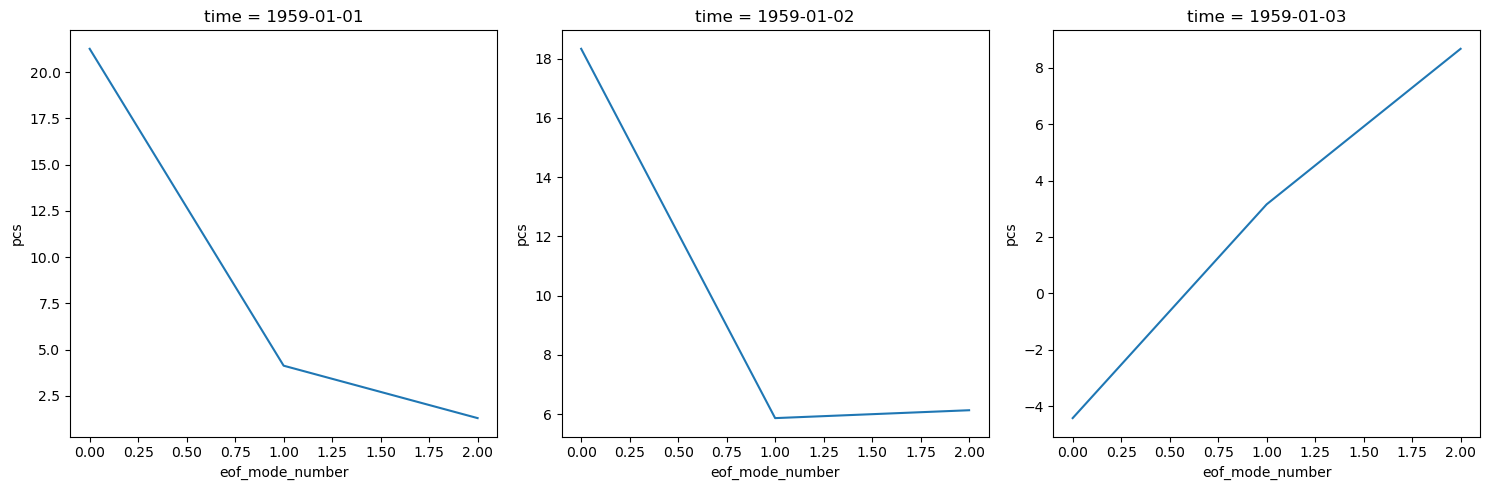

In [76]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
tcc_eof[2][0].plot(ax=ax[0])
tcc_eof[2][1].plot(ax=ax[1])
tcc_eof[2][2].plot(ax=ax[2])
plt.tight_layout();